In [1]:
import sys
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime
from scipy.stats import qmc

from GP_Validation import LOO_Analysis
from CS2_create_data import calc_y_exp
from bo_functions_generic import gen_theta_set, find_train_doc_path

import matplotlib as mpl

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M")
DateTime = None ##For Testing

#Set Parameters
#Need to run at a and b, need 2 arrays to test that this will work
Constants = np.array([[-200,-100,-170,15],
                      [-1,-1,-6.5,0.7],
                      [0,0,11,0.6],
                      [-10,-10,-6.5,0.7],
                      [1,0,-0.5,-1],
                      [0,0.5,1.5,1]])

skip_param_types = 1
true_p = Constants[skip_param_types:skip_param_types+2].flatten()
param_dict = {0 : 'a_1', 1 : 'a_2', 2 : 'a_3', 3 : 'a_4',
              4 : 'b_1', 5 : 'b_2', 6 : 'b_3', 7 : 'b_4'}

# print(Theta_True)
t = 20
d = len(true_p)
train_iter = 300
noise_std = 0.1
sep_fact = np.linspace(1,1,1)
set_lengthscale = None
explore_bias = 1

obj = np.array(["obj"])
# obj = np.array(["obj", "LN_obj"])
emulator = np.array([False])
# emulator = np.array([False, True])
# save_fig = True
# save_fig = False

#Pull Experimental data from CSV
exp_d = 2
n = 15 #Number of experimental data points to use
exp_data_doc = 'Input_CSVs/Exp_Data/d='+str(exp_d)+'/n='+str(n)+'.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1:exp_d+1]
Yexp = exp_data[:,-1]

#Define GP Testing space
LHS = False
p=20
Xexp_bounds = np.array([[-1.5, -0.5],
                        [1 , 2]])
X_space = gen_theta_set(LHS = LHS, n_points = p, dimensions = exp_d, bounds = Xexp_bounds)
Y_space = calc_y_exp(Constants, X_space, noise_std)

Date and Time:  10-Nov-2022 (16:58:40)


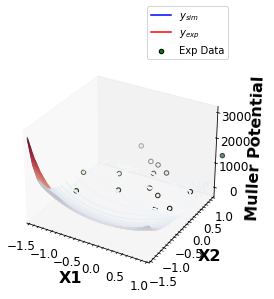

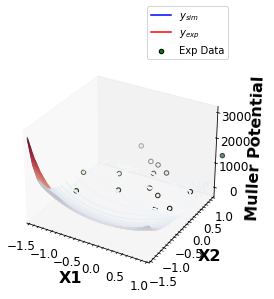

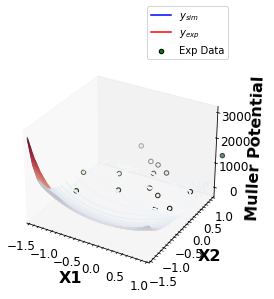

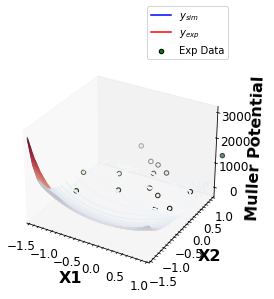

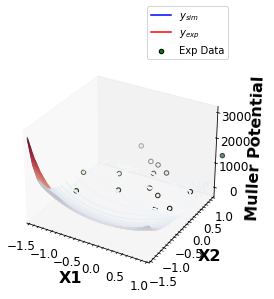

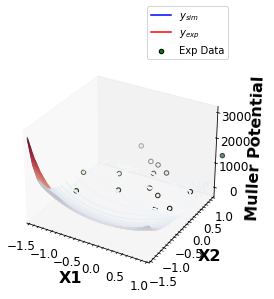

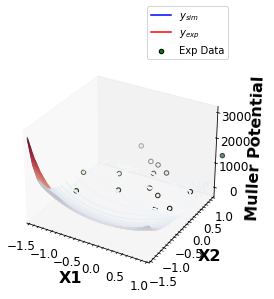

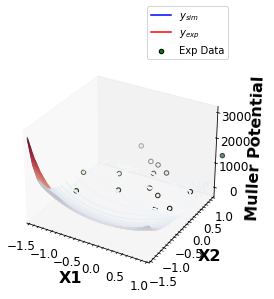

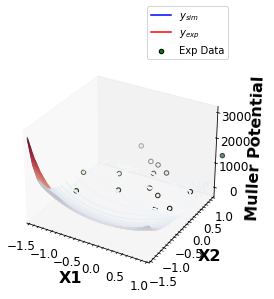

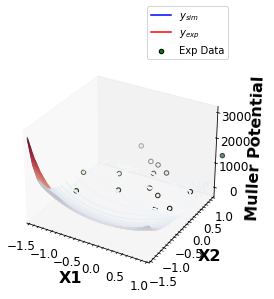

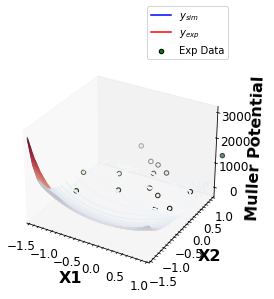

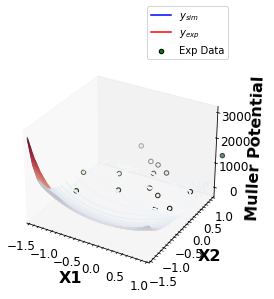

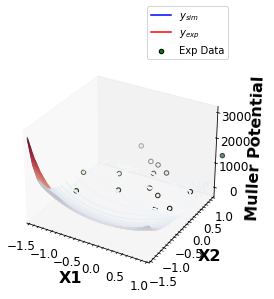

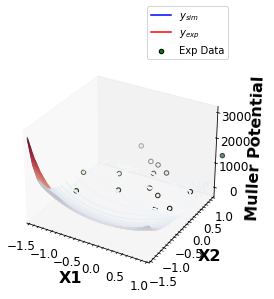

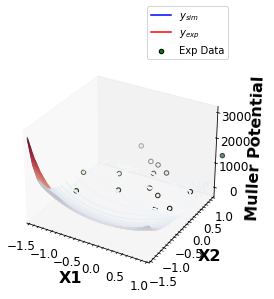

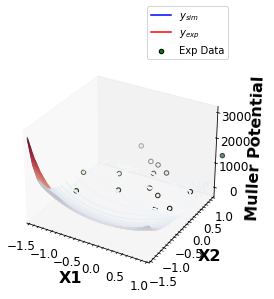

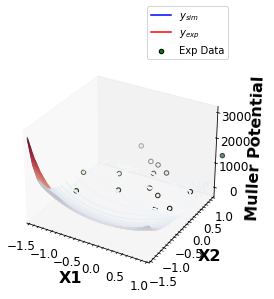

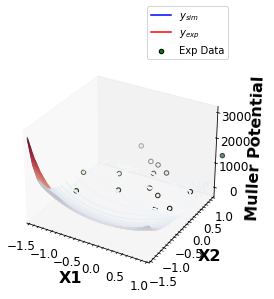

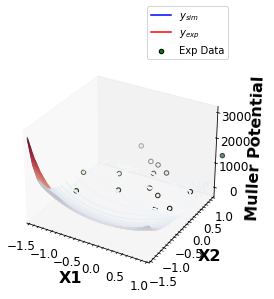

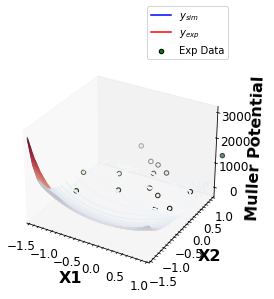

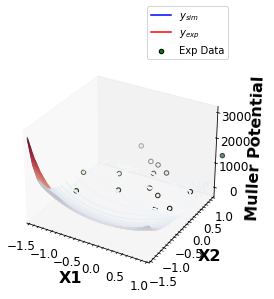

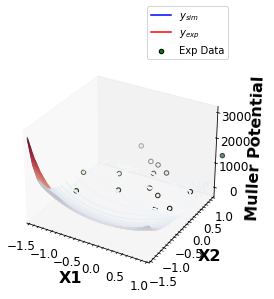

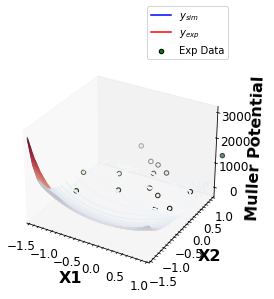

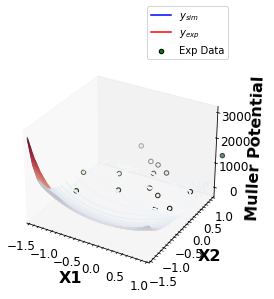

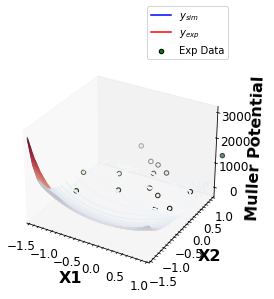

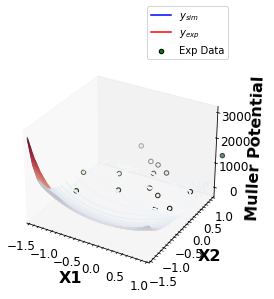

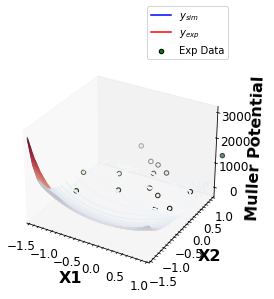

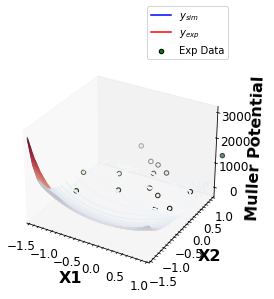

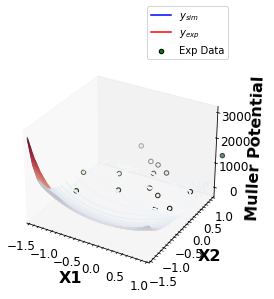

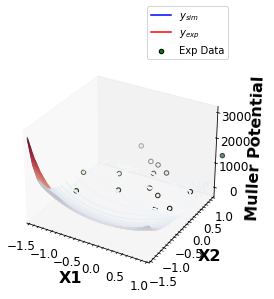

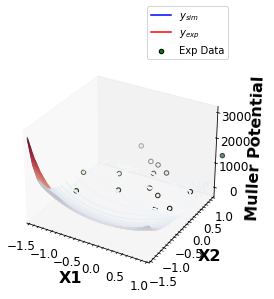

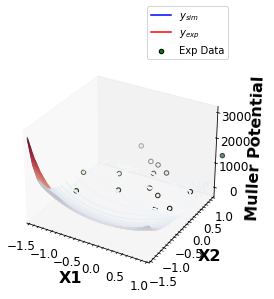

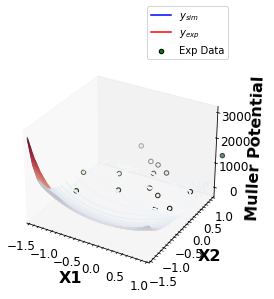

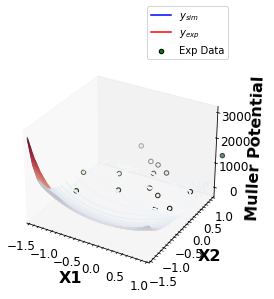

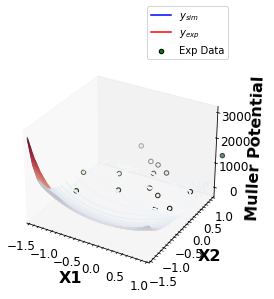

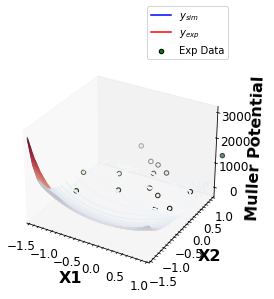

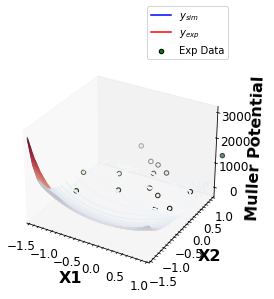

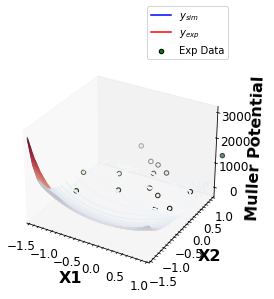

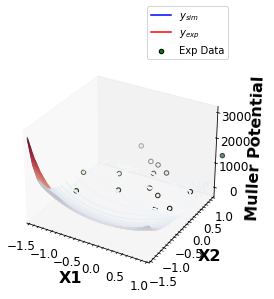

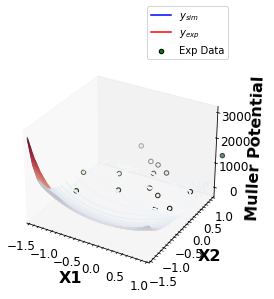

NameError: name 'eval_GP_emulator_BE' is not defined

In [3]:
for emul in emulator:
    if emul == False:
        t = t
    else:
        t = t*n
    for obj_func in obj:
        all_data_doc = find_train_doc_path(emul, obj_func, d, t)
        all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))
        LOO_Analysis(all_data, explore_bias, X_space, Y_space, Xexp, Yexp, Constants, true_p, emul, obj_func, 
                     skip_param_types = skip_param_types)